In [1]:
import pandas as pd #데이터 불러오기, 분석 등을 위한 pandas 라이브러리 사용
import numpy as np #수치 계산을 위한 numpy 라이브러리 사용
import seaborn as sns #그래프 생성을 위한 seaborn 라이브러리 사용

In [2]:
import matplotlib.pyplot as plt #그래프 생성을 위한 seaborn 라이브러리 사용
import matplotlib.font_manager as fm #그래프 생성 시 한글이 깨지지 않도록 폰트 매니저 사용

font_path = "C:/Windows/Fonts/NanumGothic.ttf" #한글이 깨지지 않도록 나눔고딕 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name() #폰트 이름을 font_name에 저장
plt.rc('font', family=font_name) #역시 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #그래프에서 마이너스를 표시하여 직관적 표시 가능

In [3]:
df = pd.read_csv("C:/Users/홍사빈/Desktop/　/학교/랩실/Backend/Project/Project1/files/result_data.csv", low_memory=False, encoding="cp949") 
#csv 파일을 불러오고, 인코딩하여 한글이 깨지지 않도록 함

In [4]:
df.info() #데이터 분석 작업을 하기 전 열의 이름과 카운트, 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150664 entries, 0 to 150663
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   접수일(년월일)  150664 non-null  object
 1   지역        150664 non-null  object
 2   판매유형      150652 non-null  object
 3   물품소분류     150607 non-null  object
 4   청구이유      149791 non-null  object
dtypes: object(5)
memory usage: 5.7+ MB


In [5]:
df.head() #csv 파일의 0~4번 인덱스를 불러와 csv 파일이 어떻게 되어있는지 미리 확인

,접수일(년월일),지역,판매유형,물품소분류,청구이유
0,2019-11-01,경기도,일반판매,양복(서양식 의복)세탁,품질(물품/용역)
1,2019-11-01,경기도,일반판매,국제결혼중개,계약불이행(불완전이행)
2,2019-11-01,충청남도,일반판매,차량용블랙박스,계약불이행(불완전이행)
3,2019-11-01,경기도,일반판매,기타병·의원서비스,가격.요금
4,2019-11-01,해외 및 기타,국제온라인거래,물티슈(휴지),표시.광고


In [6]:
print(df.columns) #데이터 분석을 하기 전 열의 이름을 직관적으로 파악하여 프로젝트 진행 방향 생각

Index(['접수일(년월일)', '지역', '판매유형', '물품소분류', '청구이유'], dtype='object')


In [7]:
df.shape #이건 그냥 데이터 몇 개인지 확인하려고...

(150664, 5)

In [8]:
df["판매유형"].unique() #'판매유형'에 뭐가 있는지 확인

array(['일반판매', '국제온라인거래', '기타통신판매', '국내온라인거래', '방문판매', '전화권유판매', '모바일거래',
       'TV홈쇼핑', '소셜커머스(쇼핑)', '기타', '노상판매', '다단계판매', '후원방문판매', nan],
      dtype=object)

In [9]:
df["지역"].unique()#'지역'에 뭐가 있는지 확인

array(['경기도', '충청남도', '해외 및 기타', '서울특별시', '대구광역시', '부산광역시', '울산광역시',
       '전라북도', '대전광역시', '강원도', '인천광역시', '전라남도', '경상남도', '경상북도', '광주광역시',
       '제주도', '충청북도', '(미입력)', '세종특별자치시'], dtype=object)

In [10]:
df["물품소분류"].unique()#'물품소분류'에 뭐가 있는지 확인

array(['양복(서양식 의복)세탁', '국제결혼중개', '차량용블랙박스', ..., '남자용한복', '세면용구유니트',
       '커터기'], dtype=object)

In [11]:
df["청구이유"].unique()#'청구이유'에 뭐가 있는지 확인

array(['품질(물품/용역)', '계약불이행(불완전이행)', '가격.요금', '표시.광고', '부당행위',
       '계약해제.해지/위약금', '청약철회', 'AS불만', '안전(제품/시설)', '단순문의.상담', '이자.수수료',
       '거래관행', '법.제도', '약관', '부당채권추심', '무능력자계약', nan], dtype=object)

In [12]:
df["판매유형"].value_counts()#'판매유형' 데이터에 있는 분류들이 각 몇 개인지 확인

일반판매         57359
국내온라인거래      39587
전화권유판매       11764
기타           11326
방문판매          8807
기타통신판매        7314
모바일거래         6136
소셜커머스(쇼핑)     5064
TV홈쇼핑         1747
국제온라인거래       1279
노상판매           162
다단계판매           96
후원방문판매          11
Name: 판매유형, dtype: int64

In [13]:
df["지역"].value_counts()#'지역' 데이터에 있는 분류들이 각 몇 개인지 확인

경기도        45362
서울특별시      42835
인천광역시      10187
부산광역시       8650
대구광역시       6050
경상남도        5950
경상북도        4086
대전광역시       3949
충청남도        3890
광주광역시       3298
충청북도        3067
강원도         2936
전라북도        2912
전라남도        2526
울산광역시       2356
제주도         1278
세종특별자치시     1131
해외 및 기타      189
(미입력)         12
Name: 지역, dtype: int64

In [14]:
df["물품소분류"].value_counts()#'물품소분류' 데이터에 있는 분류들이 각 몇 개인지 확인

유사투자자문       8658
헬스장          7453
항공여객운송서비스    4877
투자자문(컨설팅)    4039
이동전화서비스      3856
             ... 
콩가루             1
양수기             1
브레이크            1
카에어컨            1
커터기             1
Name: 물품소분류, Length: 1124, dtype: int64

In [15]:
df["청구이유"].value_counts()#'청구이유' 데이터에 있는 분류들이 각 몇 개인지 확인

계약해제.해지/위약금     49029
품질(물품/용역)       36673
계약불이행(불완전이행)    24939
청약철회            14452
부당행위             9000
AS불만             7258
표시.광고            2647
안전(제품/시설)        2012
가격.요금            1296
약관                871
단순문의.상담           483
거래관행              415
이자.수수료            353
부당채권추심            159
무능력자계약            156
법.제도               48
Name: 청구이유, dtype: int64

In [16]:
df["판매유형"].value_counts(normalize=True)#'판매유형' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인

일반판매         0.380738
국내온라인거래      0.262771
전화권유판매       0.078087
기타           0.075180
방문판매         0.058459
기타통신판매       0.048549
모바일거래        0.040730
소셜커머스(쇼핑)    0.033614
TV홈쇼핑        0.011596
국제온라인거래      0.008490
노상판매         0.001075
다단계판매        0.000637
후원방문판매       0.000073
Name: 판매유형, dtype: float64

In [17]:
df["지역"].value_counts(normalize=True)#'지역' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인

경기도        0.301081
서울특별시      0.284308
인천광역시      0.067614
부산광역시      0.057413
대구광역시      0.040156
경상남도       0.039492
경상북도       0.027120
대전광역시      0.026211
충청남도       0.025819
광주광역시      0.021890
충청북도       0.020357
강원도        0.019487
전라북도       0.019328
전라남도       0.016766
울산광역시      0.015637
제주도        0.008482
세종특별자치시    0.007507
해외 및 기타    0.001254
(미입력)      0.000080
Name: 지역, dtype: float64

In [18]:
df["물품소분류"].value_counts(normalize=True)#'물품소분류' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인

유사투자자문       0.057487
헬스장          0.049486
항공여객운송서비스    0.032382
투자자문(컨설팅)    0.026818
이동전화서비스      0.025603
               ...   
콩가루          0.000007
양수기          0.000007
브레이크         0.000007
카에어컨         0.000007
커터기          0.000007
Name: 물품소분류, Length: 1124, dtype: float64

In [19]:
df["청구이유"].value_counts(normalize=True)#'청구이유' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인

계약해제.해지/위약금     0.327316
품질(물품/용역)       0.244828
계약불이행(불완전이행)    0.166492
청약철회            0.096481
부당행위            0.060084
AS불만            0.048454
표시.광고           0.017671
안전(제품/시설)       0.013432
가격.요금           0.008652
약관              0.005815
단순문의.상담         0.003224
거래관행            0.002771
이자.수수료          0.002357
부당채권추심          0.001061
무능력자계약          0.001041
법.제도            0.000320
Name: 청구이유, dtype: float64

<Axes: >

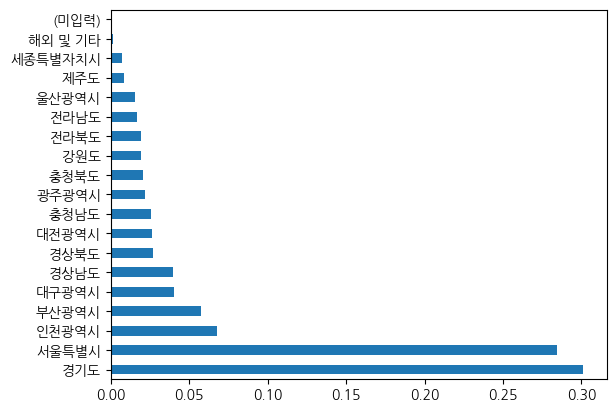

In [20]:
city_normalize = df["지역"].value_counts(normalize=True)
city_normalize.plot.barh()
#'지역' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인하는 가로그래프를 생성

<Axes: >

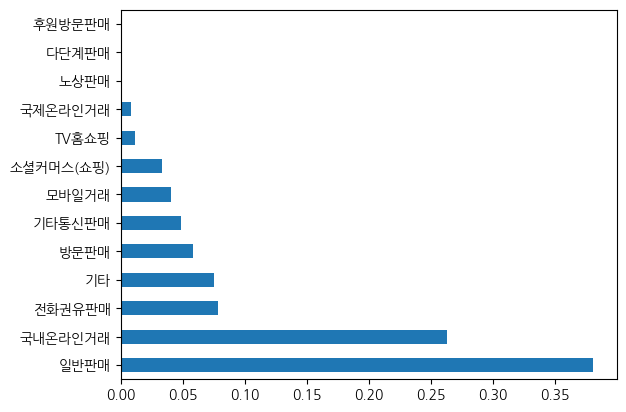

In [21]:
type_normalize=df["판매유형"].value_counts(normalize=True)
type_normalize.plot.barh()
#'판매유형' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인하는 가로그래프를 생성

In [22]:
df["접수일(년월일)"].unique() #접수일(년월일)열 확인

array(['2019-11-01', '2019-11-04', '2019-11-05', ..., '2023-03-29',
       '2023-03-30', '2023-03-31'], dtype=object)

In [23]:
df["접수일(년월일)"].value_counts() #접수일(년월일)열의 날짜들이 각 몇 개인지 확인

2021-01-05    426
2020-09-10    414
2020-09-17    414
2020-09-03    400
2020-09-09    398
             ... 
2020-07-01      1
2019-12-31      1
2021-02-14      1
2021-12-31      1
2020-10-18      1
Name: 접수일(년월일), Length: 1110, dtype: int64

In [24]:
df["접수일(년월일)"].value_counts(normalize=True) #접수일(년월일)열의 날짜들이 각 몇 퍼센트인지 확인

2021-01-05    0.002827
2020-09-10    0.002748
2020-09-17    0.002748
2020-09-03    0.002655
2020-09-09    0.002642
                ...   
2020-07-01    0.000007
2019-12-31    0.000007
2021-02-14    0.000007
2021-12-31    0.000007
2020-10-18    0.000007
Name: 접수일(년월일), Length: 1110, dtype: float64

In [25]:
df['연도'] = pd.to_datetime(df['접수일(년월일)']).dt.year
df['연도'].unique()
#날짜 하나하나 하면 그래프 x축이 엉망이라 '연도'만 보기로 함

array([2019, 2020, 2021, 2022, 2023], dtype=int64)

In [26]:
df['연도'].value_counts()
#각 연도별로 구제신청 건수 확인

2020    47080
2022    45329
2021    42790
2023     8733
2019     6732
Name: 연도, dtype: int64

In [27]:
df['연도'].value_counts(normalize=True)
#각 연도별로 구제신청 건수 퍼센테이지로 확인

2020    0.312483
2022    0.300862
2021    0.284009
2023    0.057963
2019    0.044682
Name: 연도, dtype: float64

<Axes: >

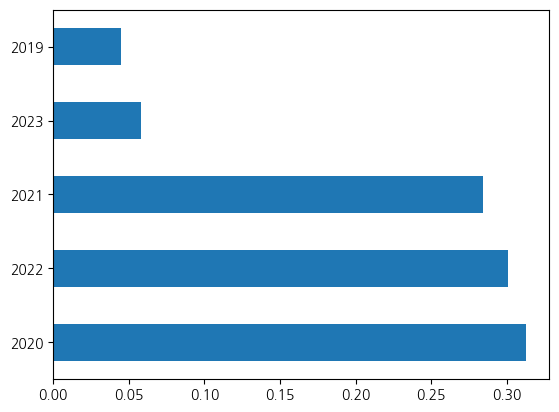

In [28]:
year_normalize=df['연도'].value_counts(normalize=True)
year_normalize.plot.barh()
#각 연도별로 구제신청 건수 퍼센테이지로 확인하고 가로그래프 생성

<Axes: >

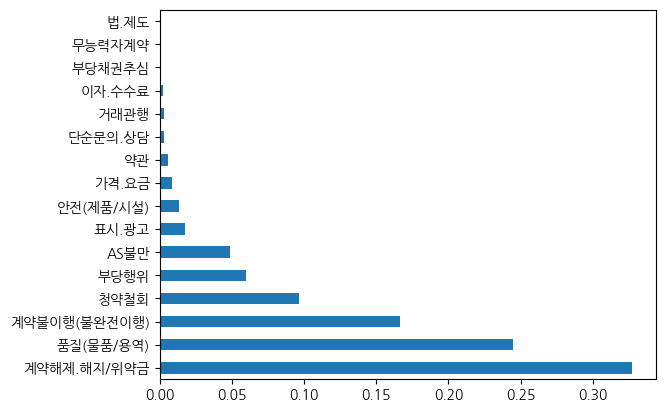

In [29]:
claim_normalize=df["청구이유"].value_counts(normalize=True)
claim_normalize.plot.barh()
#'청구이유' 데이터에 있는 분류들이 각 몇 퍼센트를 차지하는지 확인하는 가로그래프를 생성

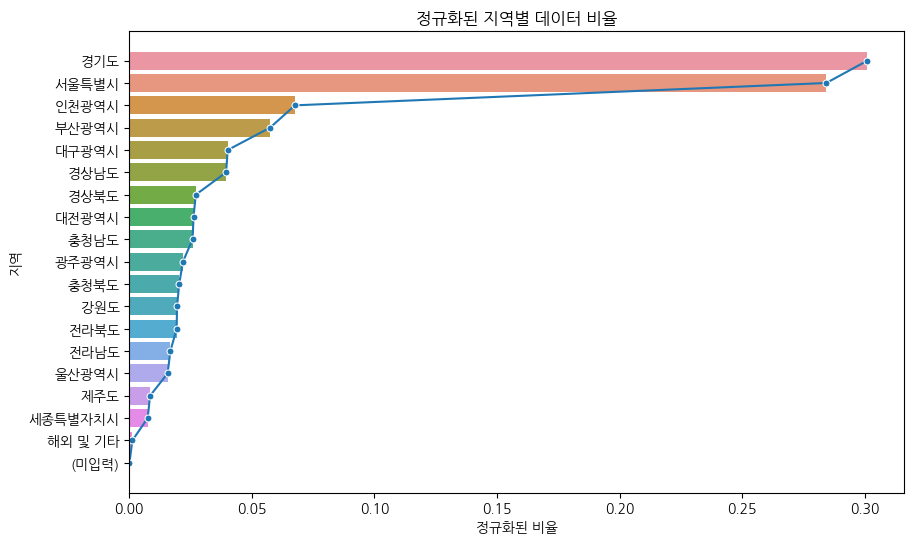

In [30]:
city_normalize = df["지역"].value_counts(normalize=True) #'지역'열과 그를 퍼센트 비율로 정의하는 city_normalize 변수 생성
city_normalize_df = city_normalize.reset_index() #변수를 데이터프레임 형태로 바꾸고, 인덱스를 초기화함
city_normalize_df.columns = ['지역', '정규화된_비율'] #'지역' 열의 이름을 '지역'으로, normalize한 열의 이름을 '정규화된_비율'로 변경 

plt.figure(figsize=(10, 6)) #그래프 사이즈 조정
sns.barplot(x='정규화된_비율', y='지역', data=city_normalize_df) 
#seaborn으로 생성한 그래프의 x축을 '정규화된 비율', y축을 '지역'으로 정함, 그래프는 정규화된 지역 데이터 프레임을 나타냄

sns.lineplot(x='정규화된_비율', y='지역', data=city_normalize_df, marker='o', markersize=5)
#그래프를 직관적으로 나타내기 위해 선 그래프를 추가함, x축과 y축의 이름, 나타내는 데이터는 위와 동일, 각 지역별로 점을 표시함

plt.xlabel("정규화된 비율") #그래프에 나타나는 x축의 이름
plt.ylabel("지역") #그래프에 나타나는 y축의 이름
plt.title("정규화된 지역별 데이터 비율") #그래프에 나타나는 제목의 이름

plt.show() #그래프 나타냄

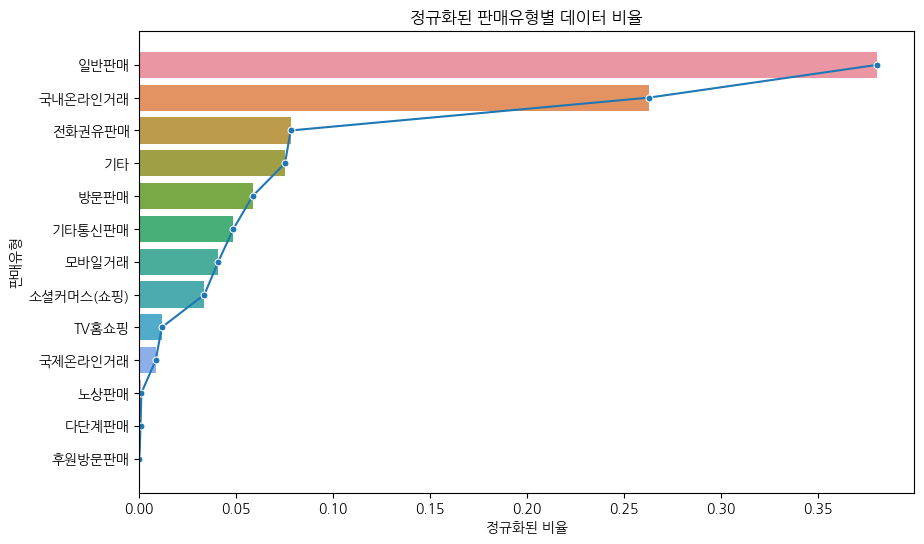

In [31]:
type_normalize = df["판매유형"].value_counts(normalize=True) #'판매유형'열과 그를 퍼센트 비율로 정의하는 type_normalize 변수 생성
type_normalize_df = type_normalize.reset_index() #변수를 데이터프레임 형태로 바꾸고, 인덱스를 초기화함
type_normalize_df.columns = ['판매유형', '정규화된_비율'] 
#'판매유형' 열의 이름을 '판매유형'으로, normalize한 열의 이름을 '정규화된_비율'로 변경 

plt.figure(figsize=(10, 6)) #그래프 사이즈 조정
sns.barplot(x='정규화된_비율', y='판매유형', data=type_normalize_df)
#seaborn으로 생성한 그래프의 x축을 '정규화된 비율', y축을 '판매유형'으로 정함, 그래프는 정규화된 판매유형 데이터 프레임을 나타냄

sns.lineplot(x='정규화된_비율', y='판매유형', data=type_normalize_df, marker='o', markersize=5)
#그래프를 직관적으로 나타내기 위해 선 그래프를 추가함, x축과 y축의 이름, 나타내는 데이터는 위와 동일, 각 지역별로 점을 표시함

plt.xlabel("정규화된 비율") #그래프에 나타나는 x축의 이름
plt.ylabel("판매유형") #그래프에 나타나는 y축의 이름
plt.title("정규화된 판매유형별 데이터 비율") #그래프에 나타나는 제목

plt.show() #그래프 나타냄

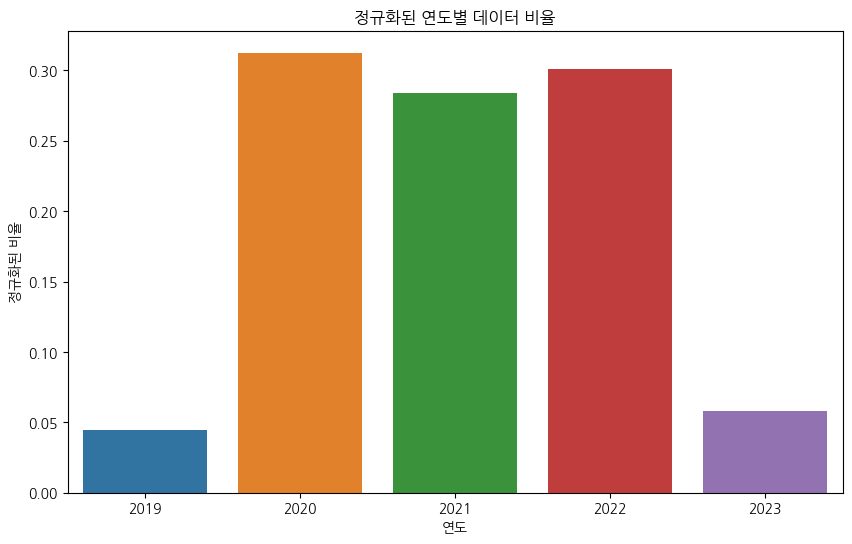

In [32]:
year_normalize = df["연도"].value_counts(normalize=True) #'연도'열과 그를 퍼센트 비율로 정의하는 year_normalize 변수 생성
year_normalize_df = year_normalize.reset_index() #변수를 데이터프레임 형태로 바꾸고, 인덱스를 초기화함
year_normalize_df.columns = ['연도', '정규화된_비율']
#'연도' 열의 이름을 '연도'으로, normalize한 열의 이름을 '정규화된_비율'로 변경 

plt.figure(figsize=(10, 6)) #그래프 사이즈 조정
sns.barplot(x='연도', y='정규화된_비율', data=year_normalize_df)
#seaborn으로 생성한 그래프의 x축을 '연도', y축을 '정규화된 비율'으로 정함, 그래프는 정규화된 연도 데이터 프레임을 나타냄

plt.xlabel("연도") #그래프에 나타나는 x축의 이름
plt.ylabel("정규화된 비율") #그래프에 나타나는 y축의 이름
plt.title("정규화된 연도별 데이터 비율")#그래프에 나타나는 제목

plt.show() #그래프 나타냄

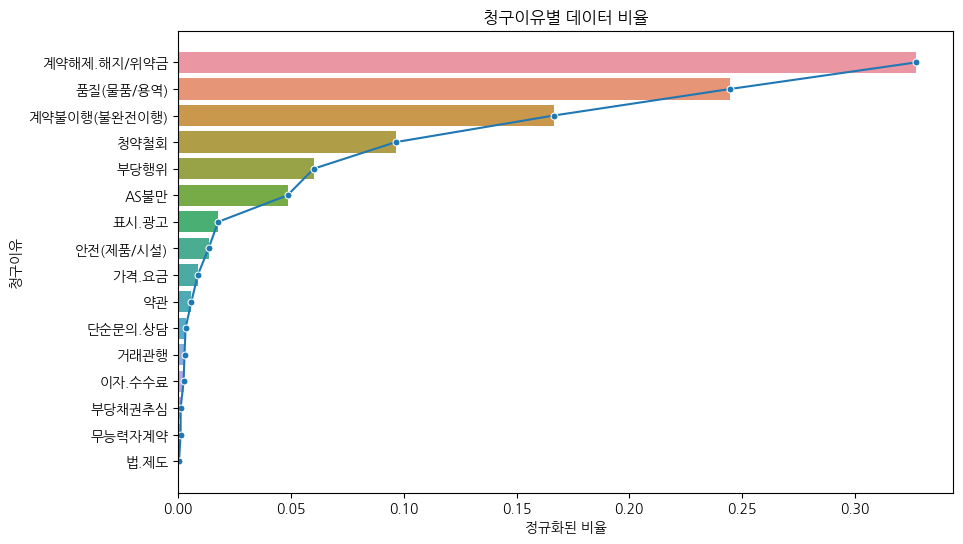

In [33]:
claim_normalize = df["청구이유"].value_counts(normalize=True) #'청구이유'열과 그를 퍼센트 비율로 정의하는 claim_normalize 변수 생성
claim_normalize_df = claim_normalize.reset_index() #변수를 데이터프레임 형태로 바꾸고, 인덱스를 초기화함
claim_normalize_df.columns = ['청구이유', '정규화된_비율']
#'청구이유' 열의 이름을 '청구이유'으로, normalize한 열의 이름을 '정규화된_비율'로 변경

plt.figure(figsize=(10, 6)) #그래프 사이즈 조정
sns.barplot(x='정규화된_비율', y='청구이유', data=claim_normalize_df)
#seaborn으로 생성한 그래프의 x축을 '정규화된 비율', y축을 '청구이유'으로 정함, 그래프는 정규화된 청구이유 데이터 프레임을 나타냄

sns.lineplot(x='정규화된_비율', y='청구이유', data=claim_normalize_df, marker='o', markersize=5)
#그래프를 직관적으로 나타내기 위해 선 그래프를 추가함, x축과 y축의 이름, 나타내는 데이터는 위와 동일, 각 청구이유별로 점을 표시함

plt.xlabel("정규화된 비율") #그래프에 나타나는 x축의 이름
plt.ylabel("청구이유") #그래프에 나타나는 y축의 이름
plt.title("청구이유별 데이터 비율") #그래프에 나타나는 제목

plt.show() #그래프 나타냄